In [3]:
%matplotlib inline

import numpy 
import pandas 
from matplotlib import pyplot
import seaborn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.externals import joblib

from sklearn.cross_validation import StratifiedKFold, cross_val_score
from sklearn import  metrics

In [4]:
#train_df = pandas.read_json("./dataset/df_train25k_text_feat_entropy_v10.json")
train_df = pandas.read_json("./dataset/df_train25k_name_desc_entropy_v14.json")
print train_df.head()
print 'raw df', len(train_df)
train_df = train_df[(train_df['description_tokenized'].str.len() > 0) & (train_df['refined_name'].str.len() > 0) & (train_df['entropy_merged'] > 0)]

print 'refined df', len(train_df)

ValueError: Expected object or value

In [211]:
#feature_list = ['refined_name_prob', 'description_prob', 'entropy_merged']
#feature_list = ['description_prob', 'entropy_merged']
#feature_list = ['refined_name_prob', 'description_prob']
feature_list = ['refined_name_prob', 'description_nn_prob', 'description_pr_prob', 'entropy_merged']
target = 'po_tag'

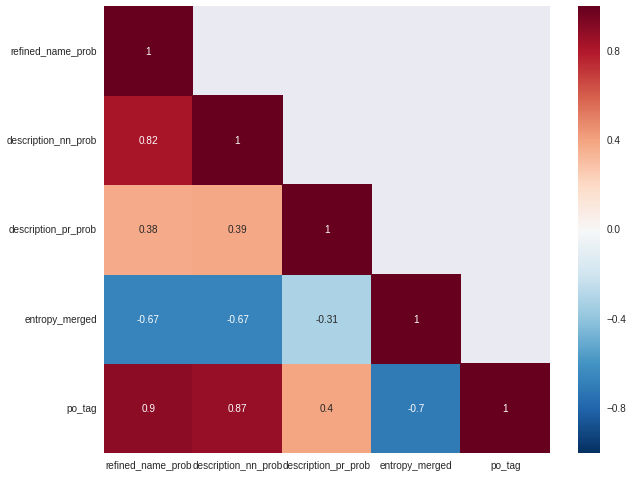

In [212]:
f, ax = pyplot.subplots(figsize=(10, 8))
corr = train_df[feature_list + [target]].corr()
mask = numpy.zeros_like(corr, dtype=numpy.bool)
mask[numpy.triu_indices_from(mask, 1)] = True
colormap = seaborn.diverging_palette(10, 100)
seaborn.heatmap(corr, mask=mask, annot=True)

In [213]:
## Feature extraction 

In [214]:
X = train_df[feature_list].as_matrix().astype(numpy.float)
y = train_df[target].values
print numpy.shape(X), numpy.shape(y)
print zip(X[:5], y[:5])

(23479, 4) (23479,)
[(array([ 0.98028658,  0.99999078,  0.37195368,  1.54887879]), 1), (array([ 0.99848113,  0.99999978,  0.31300273,  2.80697727]), 1), (array([  5.00446842e-02,   4.56673000e-05,   3.71953681e-01,
         7.42814684e+00]), 0), (array([  4.29012120e-03,   9.01762886e-01,   9.32013547e-01,
         6.47496939e+00]), 0), (array([ 0.92538729,  0.9999838 ,  0.98175814,  1.51256871]), 1)]


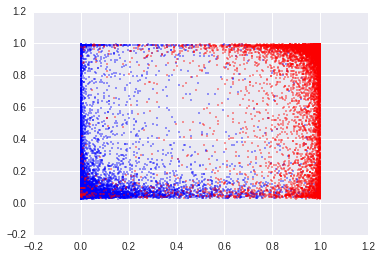

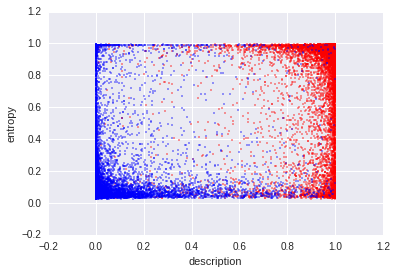

In [201]:
# plot some unscaled data: plot corr between feat & entropy
train_df_a = train_df[train_df['po_tag']==1]
train_df_b = train_df[train_df['po_tag']==0]
pyplot.scatter(train_df_b['description_prob'].values, train_df_b['entropy_prob'].values, color='blue', s=1)
pyplot.scatter(train_df_a['description_prob'].values, train_df_a['entropy_prob'].values, color='red', s=1)
pyplot.figure()
pyplot.scatter(train_df_a['description_prob'].values, train_df_a['entropy_prob'].values, color='red', s=1)
pyplot.scatter(train_df_b['description_prob'].values, train_df_b['entropy_prob'].values, color='blue', s=1)

pyplot.xlabel('description')
pyplot.ylabel('entropy')

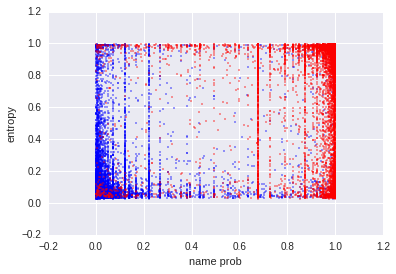

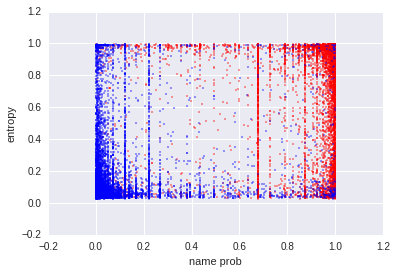

In [202]:
# plot some unscaled data: plot corr between feat & entropy
train_df_a = train_df[train_df['po_tag']==1]
train_df_b = train_df[train_df['po_tag']==0]
pyplot.scatter(train_df_b['refined_name_prob'].values, train_df_b['entropy_prob'].values, color='blue', s=1)
pyplot.scatter(train_df_a['refined_name_prob'].values, train_df_a['entropy_prob'].values, color='red', s=1)
pyplot.xlabel('name prob')
pyplot.ylabel('entropy')
pyplot.figure()
pyplot.scatter(train_df_a['refined_name_prob'].values, train_df_a['entropy_prob'].values, color='red', s=1)
pyplot.scatter(train_df_b['refined_name_prob'].values, train_df_b['entropy_prob'].values, color='blue', s=1)
pyplot.xlabel('name prob')
pyplot.ylabel('entropy')

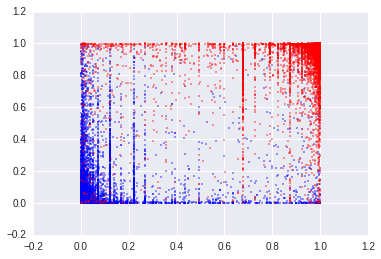

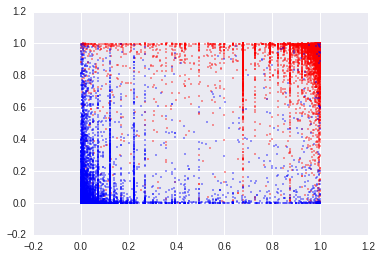

In [203]:
# plot corr between 'log_friend_follower_ratio' & 'log_favourite_listed_ratio'
pyplot.scatter(train_df_b['refined_name_prob'].values, train_df_b['description_prob'].values, color='blue', s=1)
pyplot.scatter(train_df_a['refined_name_prob'].values, train_df_a['description_prob'].values, color='red', s=1)
pyplot.figure()
pyplot.scatter(train_df_a['refined_name_prob'].values, train_df_a['description_prob'].values, color='red', s=1)
pyplot.scatter(train_df_b['refined_name_prob'].values, train_df_b['description_prob'].values, color='blue', s=1)


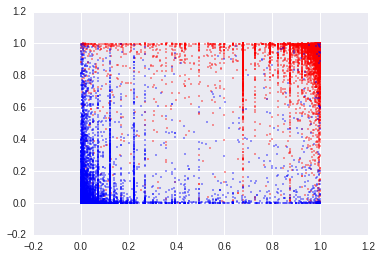

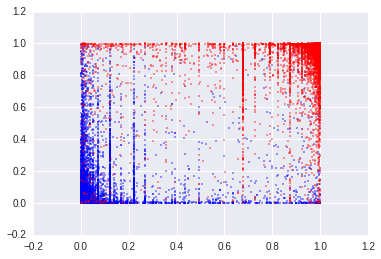

In [204]:
#'refined_name_prob', 'description_prob'
pyplot.scatter(train_df_a['refined_name_prob'].tolist(), train_df_a['description_prob'].tolist(), color='red', s=1)
pyplot.scatter(train_df_b['refined_name_prob'].tolist(), train_df_b['description_prob'].tolist(), color='blue', s=1)

pyplot.figure()


pyplot.scatter(train_df_b['refined_name_prob'].tolist(), train_df_b['description_prob'].tolist(), color='blue', s=1)
pyplot.scatter(train_df_a['refined_name_prob'].tolist(), train_df_a['description_prob'].tolist(), color='red', s=1)

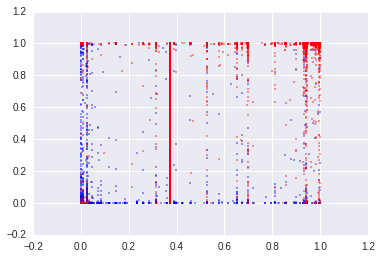

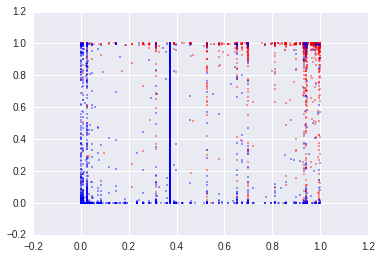

In [205]:
# plot corr between 'description_prob' & 'log_favourite_listed_ratio'
pyplot.scatter(train_df_b['description_pr_prob'].values, train_df_b['description_nn_prob'].values, color='blue', s=1)
pyplot.scatter(train_df_a['description_pr_prob'].values, train_df_a['description_nn_prob'].values, color='red', s=1)
pyplot.figure()
pyplot.scatter(train_df_a['description_pr_prob'].values, train_df_a['description_nn_prob'].values, color='red', s=1)
pyplot.scatter(train_df_b['description_pr_prob'].values, train_df_b['description_nn_prob'].values, color='blue', s=1)

In [206]:
'''
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()
X_mm_scaled = mm_scaler.fit_transform(X)
X_std_scaled = std_scaler.fit_transform(X)
#check first elems in the array
print X[0]
print X_mm_scaled[0]
print X_std_scaled[0]

print numpy.shape(X), numpy.shape(X_mm_scaled), numpy.shape(X_std_scaled), numpy.shape(y)
'''


'\nmm_scaler = MinMaxScaler()\nstd_scaler = StandardScaler()\nX_mm_scaled = mm_scaler.fit_transform(X)\nX_std_scaled = std_scaler.fit_transform(X)\n#check first elems in the array\nprint X[0]\nprint X_mm_scaled[0]\nprint X_std_scaled[0]\n\nprint numpy.shape(X), numpy.shape(X_mm_scaled), numpy.shape(X_std_scaled), numpy.shape(y)\n'

In [207]:
%%time
clf = LogisticRegression(C=1)
cv = StratifiedKFold(y, n_folds=10)
#scores = cross_val_score(clf, X_mm_scaled, y, cv=cv)
scores = cross_val_score(clf, X, y, cv=cv)
print numpy.mean(scores), numpy.std(scores)

0.967333115879 0.00599081125826
CPU times: user 544 ms, sys: 0 ns, total: 544 ms
Wall time: 539 ms


In [208]:
clf.fit(X, y)
#joblib.dump(clf, './models/lr_nameprob_descprob_entropy_v1')
joblib.dump(clf, './models/lr_nameprob_descnnprob_descprprob_entropy_v1')

['./models/lr_nameprob_descnnprob_descprprob_entropy_v1',
 './models/lr_nameprob_descnnprob_descprprob_entropy_v1_01.npy',
 './models/lr_nameprob_descnnprob_descprprob_entropy_v1_02.npy',
 './models/lr_nameprob_descnnprob_descprprob_entropy_v1_03.npy']

In [182]:
%%time
clf = RandomForestClassifier(n_estimators=36, random_state=64)
scores = cross_val_score(clf, X, y, cv=cv)
print numpy.mean(scores), numpy.std(scores)

0.977469675805 0.00343890682141
CPU times: user 6.15 s, sys: 0 ns, total: 6.15 s
Wall time: 6.09 s


In [78]:
test_df = pandas.read_json("./dataset/validation_1k_random.json")
print test_df.head()

                                 cate_proba  \
0   [[PERSON, 1.53], [ORGANIZATION, 98.47]]   
1   [[PERSON, 2.24], [ORGANIZATION, 97.76]]   
2  [[PERSON, 37.03], [ORGANIZATION, 62.97]]   
3  [[PERSON, 12.16], [ORGANIZATION, 87.84]]   
4  [[PERSON, 39.46], [ORGANIZATION, 60.54]]   

                                         description  favourites_count  \
0                    The official adBug Twitter page                 0   
1  We are a community of like minded fans of all ...               120   
2  The world's only anti-aging & anti-wrinkle ski...                 0   
3  Soho cocktail bar & restaurant in a unique Art...              1621   
4  A small press in Brooklyn.  (For Shelly, try @...                73   

   followers_count  friends_count lang  listed_count                 name  \
0               23             26   en             0               adBug™   
1             1117            122   en            20          Tardis Blue   
2              463           1855   en   

In [243]:
#use linear regression to predict test data

clf = LogisticRegression(C=1)
cv = StratifiedKFold(y, n_folds=10)
clf.fit(X_mm_scaled, y)


print test_df.head()
X_test = test_df[feature_list].as_matrix().astype(numpy.float)
X_test_mm_scaled = mm_scaler.fit_transform(X_test)

scores = cross_val_score(clf, X_mm_scaled, y, cv=cv)

print numpy.mean(scores), numpy.std(scores)

                                 cate_proba  \
0   [[PERSON, 1.53], [ORGANIZATION, 98.47]]   
1   [[PERSON, 2.24], [ORGANIZATION, 97.76]]   
2  [[PERSON, 37.03], [ORGANIZATION, 62.97]]   
3  [[PERSON, 12.16], [ORGANIZATION, 87.84]]   
4  [[PERSON, 39.46], [ORGANIZATION, 60.54]]   

                                         description  favourites_count  \
0                    The official adBug Twitter page                 0   
1  We are a community of like minded fans of all ...               120   
2  The world's only anti-aging & anti-wrinkle ski...                 0   
3  Soho cocktail bar & restaurant in a unique Art...              1621   
4  A small press in Brooklyn.  (For Shelly, try @...                73   

   followers_count  friends_count lang  listed_count                 name  \
0               23             26   en             0               adBug™   
1             1117            122   en            20          Tardis Blue   
2              463           1855   en   

KeyError: "['text_feat' 'refined_name_prob'] not in index"